In [51]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
api = wandb.Api()
entity = ""# PUT YOUR WANDB ACCOUNT HERE
project = "ALL_Inv_Resilience"
runs = api.runs(f"{entity}/{project}")
epsilon = 0.1
quad_coeff = 0.5
transformations = ["rotation", "scale", "translation"]
all_runs = []
for run in runs:
    if True:
        config = run.config
        if "epsilon" in config and config["epsilon"] == epsilon:
            if "quad_coeff" in config and config["quad_coeff"]==quad_coeff:
                for transformation in transformations:
                    run_dict = {"dataset": "fmnist" if "fmnist" in config["dataset"] else "mnist"}
                    run_dict["transformation"] = transformation
                    if "r90" in config["dataset"]:
                        invariance = "Rot. (90)"
                        true_inv = transformation=="rotation"
                    elif "r180" in config["dataset"]:
                        invariance = "Rot. (180)"
                        true_inv = transformation=="rotation"
                    elif "translated" in config["dataset"]:
                        invariance = "Translation"
                        true_inv = transformation=="translation"
                    elif "scaled" in config["dataset"]:
                        invariance = "Scaled"
                        true_inv = transformation=="scale"
                    else:
                        invariance = "None"
                        true_inv = False
                    run_dict["Syntetic inv."] = invariance
                    run_dict["transformation"] = transformation
                    run_dict["True Inv."] = true_inv
                    run_dict["Perturbation (u)"] = run.summary[f"u_{transformation}"]
                    run_dict["Dual variables ($\lambda^{\star}$)"] = run.summary[f"dual_{transformation}"]
                    run_dict["Formulation"] = "Resilient"
                    all_runs.append(run_dict)
df = pd.DataFrame(all_runs)               

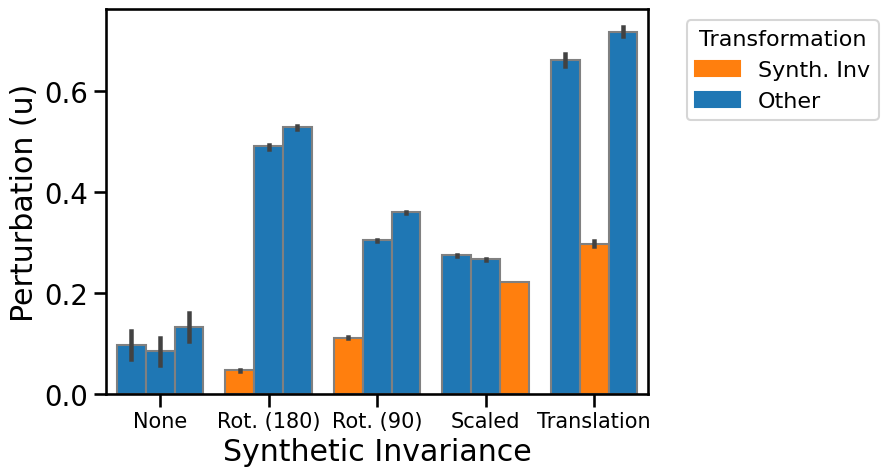

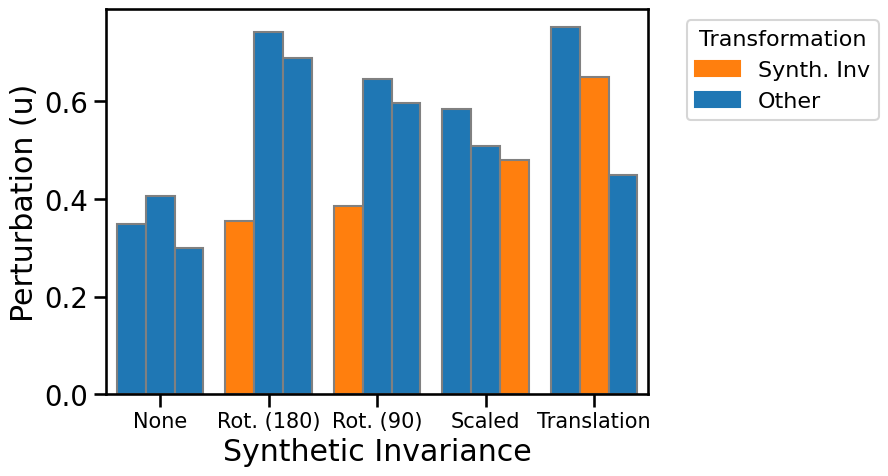

In [52]:
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib as mpl
true_inv = [0,0,0,1,0,0,1,0,0,0,0,1,0,1,0]
sns.set_context("talk", font_scale=1.2)
mpl.rcParams['lines.linewidth'] = 1.8
for dataset in ["mnist", "fmnist"]:
    df_dset = df[df["dataset"]==dataset]
    df_dset = df_dset.sort_values("Syntetic inv.")
    fig, ax = plt.subplots(figsize=(7, 5)) 
    sns.barplot(x="Syntetic inv.", y="Perturbation (u)", ax=ax,
                     hue="transformation", data=df_dset)
    patch_dict = {}
    for bar in ax.patches:
        patch_dict[bar.get_x()] = bar
    pos = list(patch_dict.keys())
    pos.sort()
    for i, p in enumerate(pos):
        patch_dict[p].set(edgecolor='gray', facecolor="C{}".format(true_inv[i]))
    #plt.title("Perturbation vs Transformation for Invariant MNIST")
    plt.xlabel("Synthetic Invariance")
    true_patch = mpatches.Patch(color='C1', label='Synth. Inv')
    false_patch = mpatches.Patch(color='C0', label='Other')
    ax.tick_params(axis="x",  labelsize=15)
    plt.legend(handles=[true_patch, false_patch], title="Transformation", fontsize=16,title_fontsize=16, loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.savefig(f"perturbation_inv_{dataset}.pdf", bbox_inches='tight')
    plt.show()

In [53]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
api = wandb.Api()
project = "ALL_ALL_Invariance"
entity = ""# PUT YOUR WANDB ACCOUNT HERE
runs = api.runs(f"{entity}/{project}")
epsilon = 0.1
quad_coeff = 0.5
transformations = ["rotation", "scale", "translation"]
for run in runs:
    if True:
        config = run.config
        if "epsilon" in config and config["epsilon"] == epsilon:
            for transformation in transformations:
                run_dict = {"dataset": "fmnist" if "fmnist" in config["dataset"] else "mnist"}
                run_dict["transformation"] = transformation
                if "r90" in config["dataset"]:
                    invariance = "Rot. (90)"
                    true_inv = transformation=="rotation"
                elif "r180" in config["dataset"]:
                    invariance = "Rot. (180)"
                    true_inv = transformation=="rotation"
                elif "translated" in config["dataset"]:
                    invariance = "Translation"
                    true_inv = transformation=="translation"
                elif "scaled" in config["dataset"]:
                    invariance = "Scaled"
                    true_inv = transformation=="scale"
                else:
                    invariance = "None"
                    true_inv = False
                run_dict["Syntetic inv."] = invariance
                run_dict["transformation"] = transformation
                run_dict["True Inv."] = true_inv
                run_dict["Dual variables ($\lambda^{\star}$)"] = run.summary[f"dual_{transformation}"]
                run_dict["Formulation"] = "Constrained"

                all_runs.append(run_dict)
df = pd.DataFrame(all_runs)               

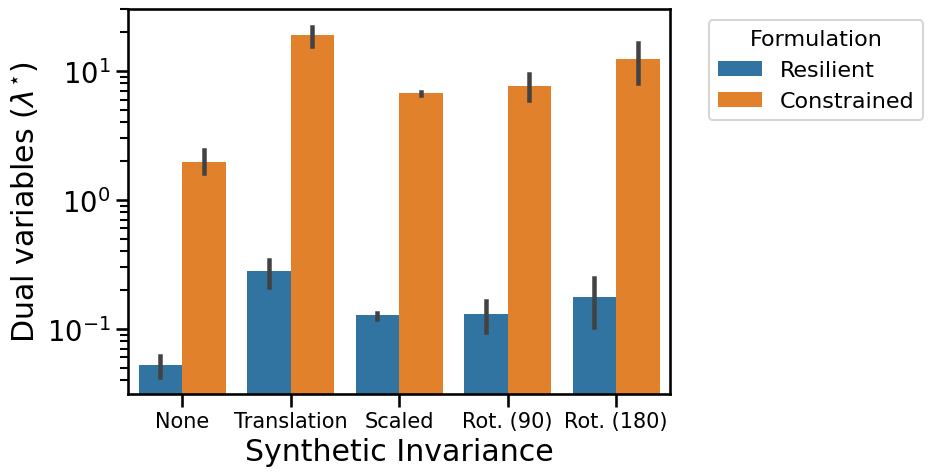

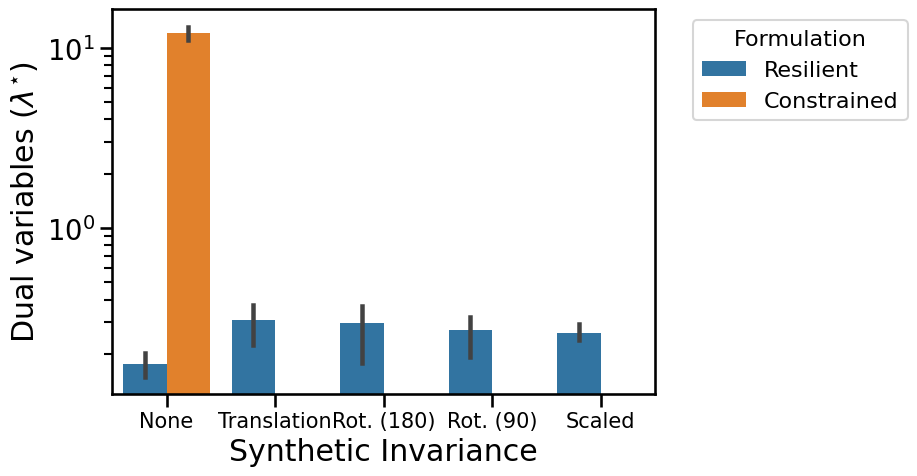

In [54]:
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib as mpl
true_inv = [0,0,0,1,0,0,1,0,0,0,0,1,0,1,0]
sns.set_context("talk", font_scale=1.2)
mpl.rcParams['lines.linewidth'] = 1.8
for dataset in ["mnist", "fmnist"]:
    #df_dset = df[df["Syntetic inv."]==False]
    df_dset = df[df["dataset"]==dataset]
    df_dset = df_dset.sort_values("transformation")
    fig, ax = plt.subplots(figsize=(7, 5)) 
    sns.barplot(x="Syntetic inv.", y="Dual variables ($\lambda^{\star}$)", ax=ax,
                     hue="Formulation", data=df_dset)
    patch_dict = {}
    for bar in ax.patches:
        patch_dict[bar.get_x()] = bar
    pos = list(patch_dict.keys())
    pos.sort()
    #for i, p in enumerate(pos):
        #patch_dict[p].set(edgecolor='gray', facecolor="C{}".format(true_inv[i]))
    #plt.title("Perturbation vs Transformation for Invariant MNIST")
    plt.xlabel("Synthetic Invariance")
    plt.yscale("log")
    #true_patch = mpatches.Patch(color='C1', label='Synth. Inv')
    #false_patch = mpatches.Patch(color='C0', label='Other')
    ax.tick_params(axis="x",  labelsize=15)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title="Formulation", fontsize=16,title_fontsize=16)
    #plt.legend(handles=[true_patch, false_patch], title="Transformation", fontsize=16,title_fontsize=16, loc='upper center')
    plt.savefig(f"dual_inv_{dataset}.pdf", bbox_inches='tight')
    plt.show()